# Interactive Python-Pandas-Jupyter Tutorial
The New York Times has made their [COVID-19 data available on GitHub](https://github.com/nytimes/covid-19-data). Note there is more detailed data from [Johns Hopkins University](https://github.com/CSSEGISandData/COVID-19) as well, but the NY Times data focus on just US States and counties in an easy to read format which makes it ideal for a tutorial.

## Purpose
Why you ask? In my opinion we are confronting the greatest existential threat since [WW2](https://en.wikipedia.org/wiki/World_War_II). I believe it's natural to feel strong emotions like anger, sorrow, frustration, and fear. I think one possible coping mechanism for dealing with these feelings could be learning more about the extent and rapid changes in the spread of COVID-19, and possibly gain some perspective and understanding. Although our futures' now seem impossibly out of control, and I think it would be misguided to expect that we could accurately predict what the future will hold, but nevertheless, playing with the data may give us some relief and a tiny sense of control at least over the immediate and what has already past.

## Method
How you ask? This is a [Jupyter notebook](https://jupyter.org/) running online in [MyBinder](https://mybinder.org/). You can run all of the calculations in this Jupyter notebook with nothing but an internet connection and a browser. You do not need to install anything, no Python, no Git, no nothin'. You just need to know how to run the notebook. The notebook is divided into **cells** which can have either text or code. Code cells may be followed by output. To execute a cell do one of the following:

* click the **Run** button in the tool bar,
* select **Cell > Run** from the menu, or
* press Shift+Enter on your keyboard

**_WARNING_**: Cells in a Jupyter notebook can be executed in any order, but the state of the notebook will be changed after each execution. Therefore it's best to run the cells from top to bottom. You can clear and run all of the cells by selecting **Kernel > Restart & Run All** from the menu.

Feel free to explore the notebook. Mess it up as much as you want and then restart MyBinder anytime with a fresh copy.

## Python
OK! Let's get started. This notebook uses [Python](https://www.python.org/) and the [Python Pandas package](https://pandas.pydata.org/) to manipulate the New York Times COVID-19 data. We'll also use a few extra Python packages which we need to import into our notebook first.

In [1]:
# this is a code cell

# invoke Jupyter magic commands to make plots inline 
%matplotlib inline

# now inport Python packages we need
from matplotlib import pyplot as plt  # matplotlib is a plotting library
import numpy as np                    # always use NumPy for array math in Python
import pandas as pd                   # Pandas is a data management tool
import seaborn as sns                 # seaborn just makes plots look nice

sns.set(font_scale=1.5)

In [2]:
# parse the NY Times data comma-separated values (CSV) file called "us-states.csv"
# and set the index to the date column 
states = pd.read_csv('us-states.csv', index_col='date')
states.head()  # show the first few rows of the data

,state,fips,cases,deaths
date,,,,
2020-01-21,Washington,53,1,0
2020-01-22,Washington,53,1,0
2020-01-23,Washington,53,1,0
2020-01-24,Illinois,17,1,0
2020-01-24,Washington,53,1,0


In [3]:
latest_data = states.index[-1]
latest_data

'2020-04-12'

In [4]:
# use pandas date offsets
timestamp_2weeks = pd.to_datetime(latest_data) - pd.to_timedelta('14D')
two_weeks = str(timestamp_2weeks.date())
two_weeks

'2020-03-29'

In [5]:
# pivot the states data to get the deaths for each state by date
deaths = states.pivot(columns='state', values='deaths')

# show the deaths in CA, NY, & WA from March 16th to the 27th
deaths[two_weeks:latest_data][['California', 'New York', 'Washington']].T

# for more information about Pandas DataFrame pivot, see the documentation:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html

date,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03,2020-04-04,2020-04-05,2020-04-06,2020-04-07,2020-04-08,2020-04-09,2020-04-10,2020-04-11,2020-04-12
state,,,,,,,,,,,,,,,
California,130.0,146.0,183.0,212.0,247.0,282.0,323.0,349.0,386.0,447.0,506.0,548.0,594.0,632.0,676.0
New York,965.0,1224.0,1550.0,1941.0,2653.0,2935.0,3568.0,4161.0,4758.0,5563.0,6268.0,7067.0,7844.0,8627.0,9385.0
Washington,207.0,221.0,226.0,249.0,272.0,293.0,318.0,344.0,383.0,409.0,430.0,456.0,483.0,498.0,511.0


In [6]:
# get the total deaths for each state
total_deaths = deaths.max()
total_deaths.describe()  # describe the statistics

count      56.000000
mean      393.875000
std      1287.745233
min         0.000000
25%        22.000000
50%        84.000000
75%       289.250000
max      9385.000000
dtype: float64

In [7]:
# total deaths from COVID-19 in US
print(f"Total number of Americans lost to COVID-19: {total_deaths.sum():g}")

Total number of Americans lost to COVID-19: 22057


Text(0, 0.5, 'Total Deaths')

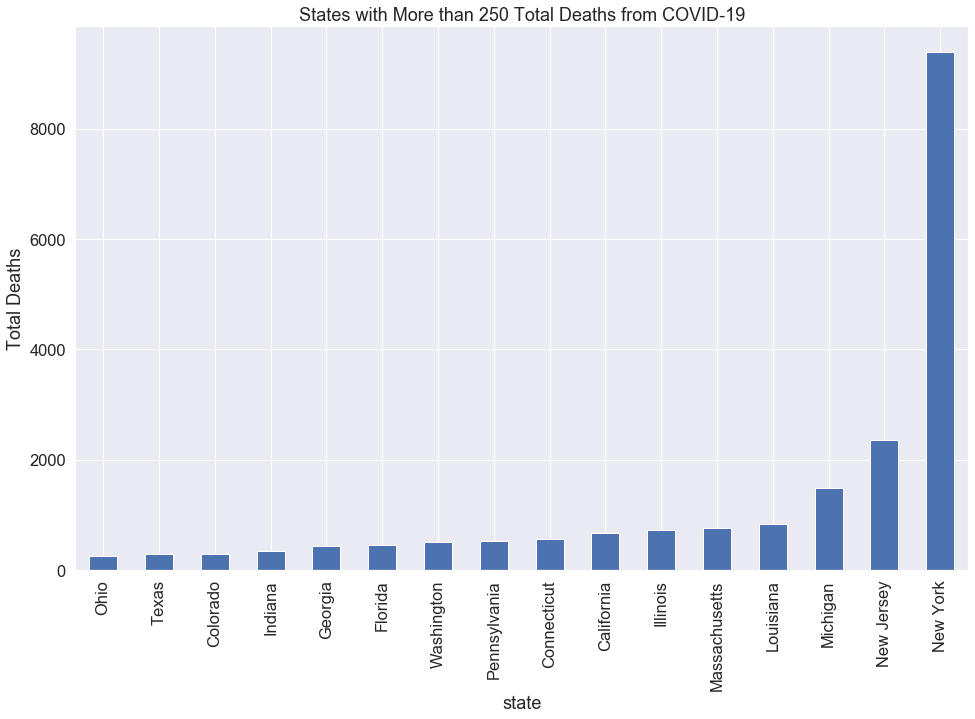

In [8]:
# create a filter for states with greater than N deaths
NDEAD = 250  # these are real people who had family and friends!
gt100_deaths_filter = total_deaths > NDEAD

# make a bar plot of the top states
total_deaths[gt100_deaths_filter].sort_values(axis=0).plot.bar(figsize=(16, 10))
plt.title(f'States with More than {NDEAD} Total Deaths from COVID-19')
plt.ylabel('Total Deaths')

Text(0, 0.5, 'Total Deaths')

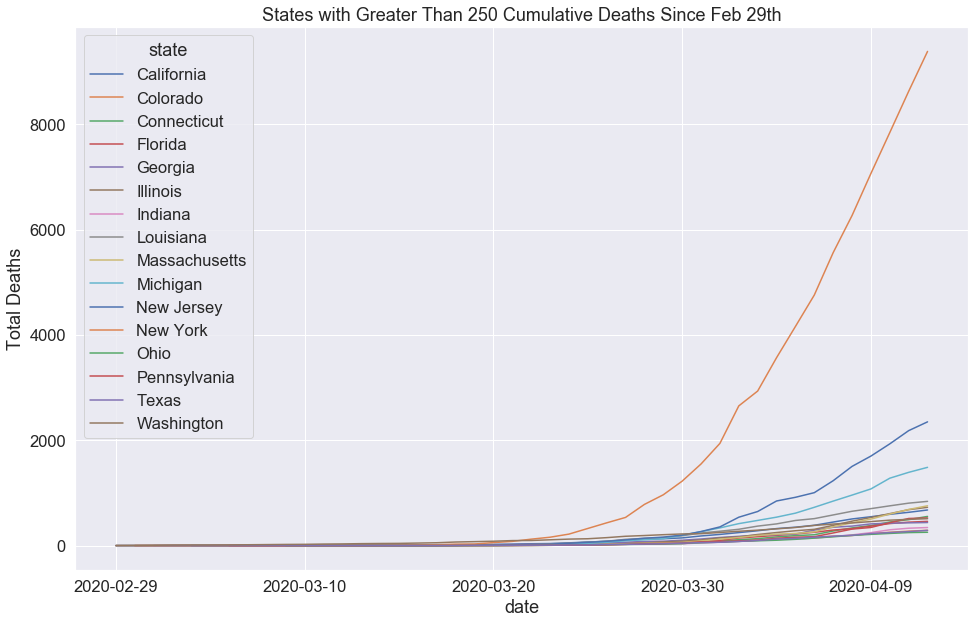

In [9]:
# get a list of the states with greater than 100 deaths
gt100_deaths_states = deaths.columns[gt100_deaths_filter] 

# plot the cumulative deaths since Feb 29th
feb29 = '2020-02-29'
deaths[feb29:latest_data][gt100_deaths_states].plot(figsize=(16, 10))
plt.title(f'States with Greater Than {NDEAD} Cumulative Deaths Since Feb 29th')
plt.ylabel('Total Deaths')

Text(0, 0.5, 'Total Deaths (thick dashed line is total for all states)')

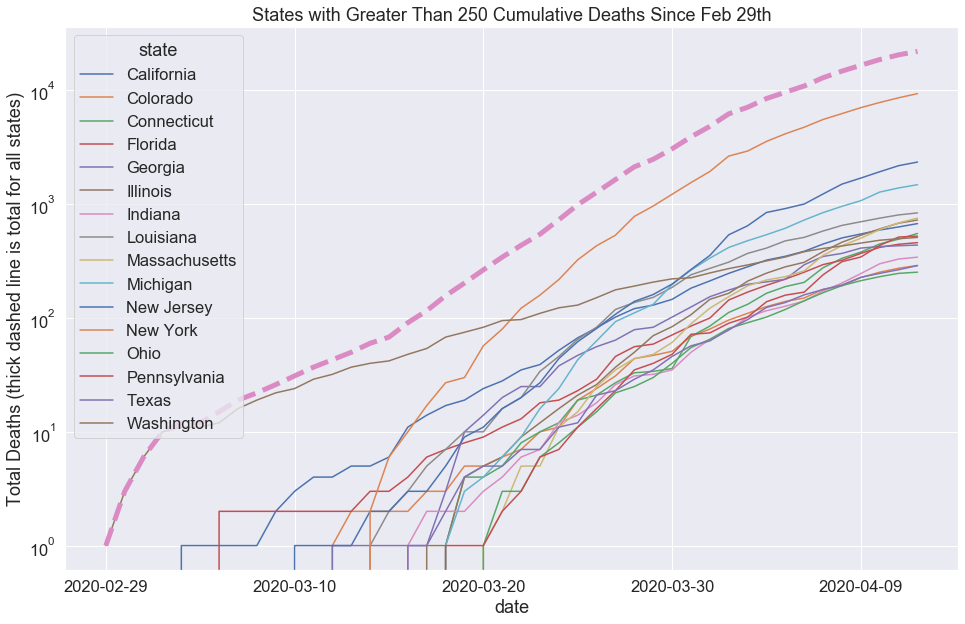

In [10]:
# plot on a log scale
ax = deaths[feb29:latest_data][gt100_deaths_states].plot(figsize=(16, 10), logy=True)

# share the axes with another plot of total deaths
deaths[feb29:latest_data].sum(axis=1).plot(axes=ax, linewidth=5, linestyle='dashed')
plt.title(f'States with Greater Than {NDEAD} Cumulative Deaths Since Feb 29th')
plt.ylabel('Total Deaths (thick dashed line is total for all states)')

# California
Let's take a closer look at California and try to see if it fits an exponential growth

In [11]:
# get a time series of the California deaths
california = deaths['California']
california.head()

date
2020-01-21    NaN
2020-01-22    NaN
2020-01-23    NaN
2020-01-24    NaN
2020-01-25    0.0
Name: California, dtype: float64

In [12]:
# days with more than 1 death (non-zero deaths)
nz_ca = california[california > 0]

# find day zero for California
zero_day = nz_ca.index[0]
print(f'day zero is {zero_day}')

nz_ca  # display the list

day zero is 2020-03-04


date
2020-03-04      1.0
2020-03-05      1.0
2020-03-06      1.0
2020-03-07      1.0
2020-03-08      1.0
2020-03-09      2.0
2020-03-10      3.0
2020-03-11      4.0
2020-03-12      4.0
2020-03-13      5.0
2020-03-14      5.0
2020-03-15      6.0
2020-03-16     11.0
2020-03-17     14.0
2020-03-18     17.0
2020-03-19     19.0
2020-03-20     24.0
2020-03-21     28.0
2020-03-22     35.0
2020-03-23     39.0
2020-03-24     52.0
2020-03-25     67.0
2020-03-26     82.0
2020-03-27    102.0
2020-03-28    121.0
2020-03-29    130.0
2020-03-30    146.0
2020-03-31    183.0
2020-04-01    212.0
2020-04-02    247.0
2020-04-03    282.0
2020-04-04    323.0
2020-04-05    349.0
2020-04-06    386.0
2020-04-07    447.0
2020-04-08    506.0
2020-04-09    548.0
2020-04-10    594.0
2020-04-11    632.0
2020-04-12    676.0
Name: California, dtype: float64

In [13]:
# calculate the least squares fit in the form y = mx + b 
# where x are the number of days since day zero
days = pd.DatetimeIndex(nz_ca.index) - np.datetime64(zero_day, 'D')

# days is a timedelta in nanoseconds, convert to days as floats
x = (days.values/3600/24/1e9).astype(float)  # days
ndays = x.size  # how many days in day zero?

# append a column of constants [1] to get a constant "b"
A = np.concatenate([x.reshape([ndays, 1]), np.ones([ndays, 1])], axis=1)

x  # display the list of days as floats

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39.])

In [14]:
# if death rate is exponential, then in logspace it's a straight line
log_nz_ca = np.log(nz_ca.values)
log_nz_ca  # display list of non-zero CA deaths in logspace

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.69314718, 1.09861229, 1.38629436, 1.38629436, 1.60943791,
       1.60943791, 1.79175947, 2.39789527, 2.63905733, 2.83321334,
       2.94443898, 3.17805383, 3.33220451, 3.55534806, 3.66356165,
       3.95124372, 4.20469262, 4.40671925, 4.62497281, 4.79579055,
       4.86753445, 4.98360662, 5.20948615, 5.35658627, 5.50938834,
       5.64190707, 5.77765232, 5.85507192, 5.95583737, 6.10255859,
       6.22653667, 6.30627529, 6.38687932, 6.44888939, 6.51619308])

In [15]:
# calcuate least squares fit for y = mx + b,
# y is the log of deaths, x is days since day zero
result = np.linalg.lstsq(A, log_nz_ca, rcond=None)

# get the coefficients for the result
m, b = result[0]
print(f'y = mx+b, m={m:g}, b={b:g}')

# for more information on NumPy Linear Algebra Least Squares see:
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.lstsq.html#numpy.linalg.lstsq

y = mx+b, m=0.184518, b=-0.0169368


In [16]:
# day 24 fit
m24 = 0.217197
b24 = -0.360004
y24 = np.exp(x*m24 + b24)

Text(0, 0.5, 'Total CA Deaths')

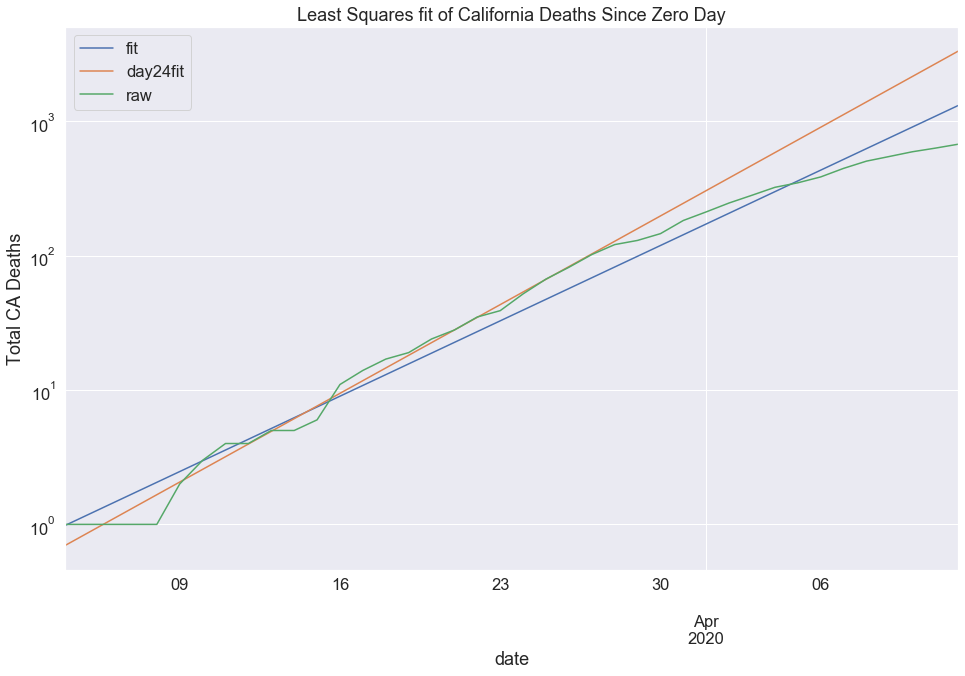

In [17]:
# calculate the fitted deaths, and compare to the NY Times data
y = np.exp(x*m + b)  # fit number of CA deaths

# get the days as dates and create a Pandas DataFrame for convenience
fit_days = pd.DatetimeIndex(pd.Timestamp(zero_day) + days)
ca_fit = pd.DataFrame({'fit': y, 'day24fit': y24, 'raw': nz_ca.values}, index=fit_days)

# make a log-plot
ca_fit.plot(logy=True, figsize=(16, 10))
plt.title('Least Squares fit of California Deaths Since Zero Day')
plt.ylabel('Total CA Deaths')

Text(0, 0.5, 'Total CA Deaths')

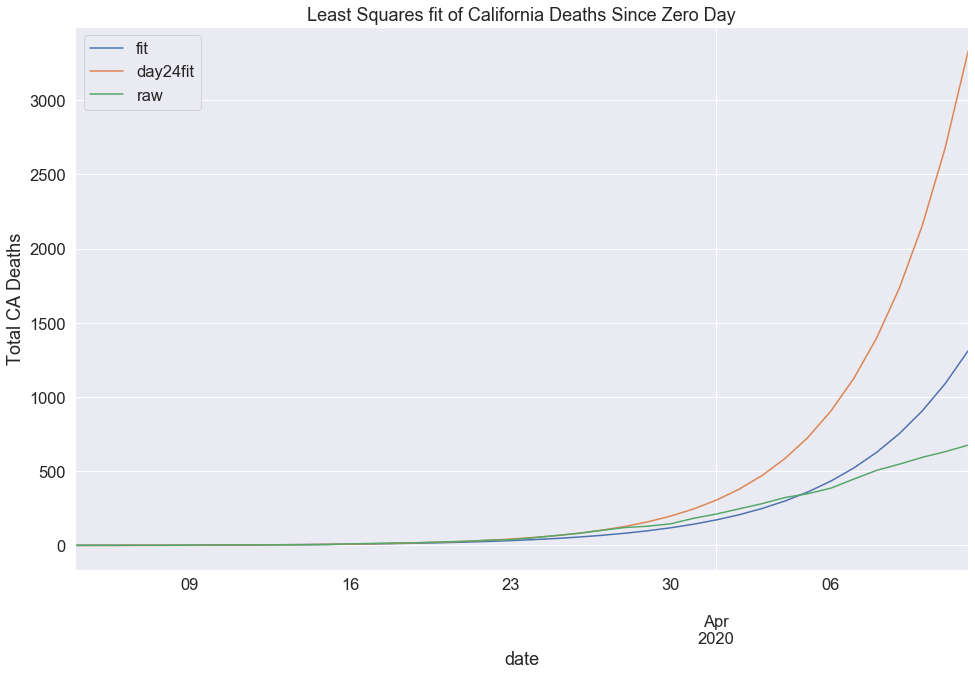

In [18]:
# plot in linear space
ca_fit.plot(figsize=(16, 10))
plt.title('Least Squares fit of California Deaths Since Zero Day')
plt.ylabel('Total CA Deaths')

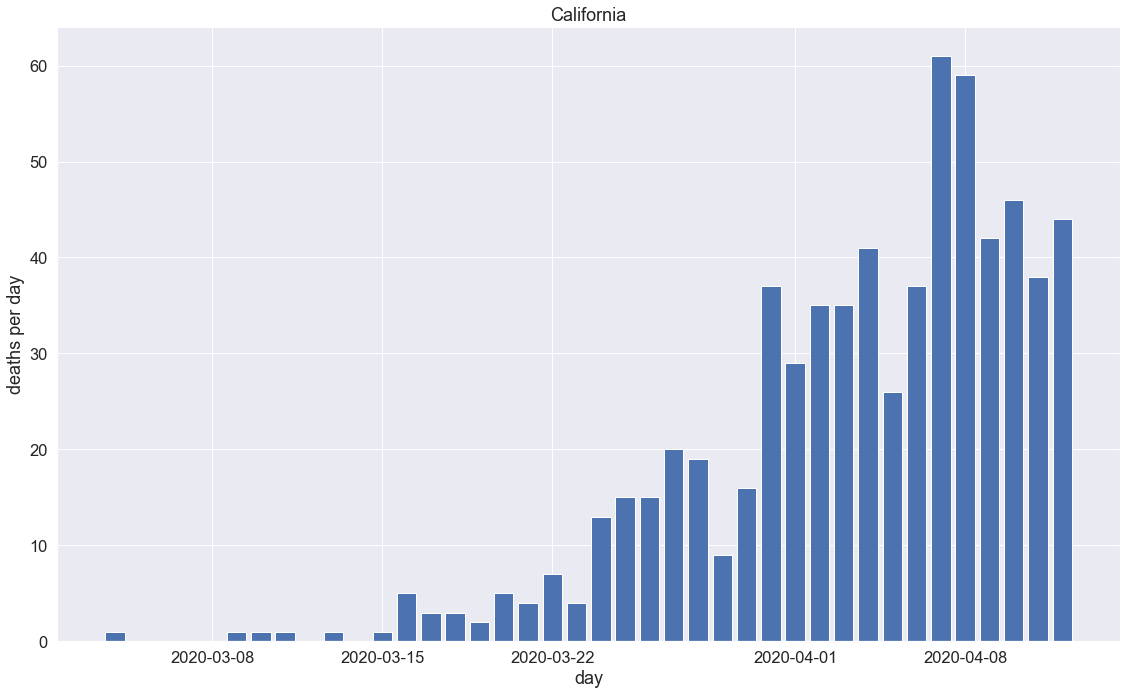

In [19]:
# deaths per day, is it flattening?
f = plt.figure(figsize=(16, 10))
plt.bar(fit_days, np.diff(np.append(0, nz_ca.values)))
plt.title('California')
plt.ylabel('deaths per day')
plt.xlabel('day')
f.tight_layout()

# Conclusions
Well I can't really draw any conclusions other than having shown that the growth is very clearly exponential. However I hope to continue monitoring the daily deathtoll and compare it to the exponential just calculated, and eventially see the slope change and start to fall below the exponential growth, which could signal end of exponential growth in California, which could mean the end of the pandemic would soon follow.